In [9]:
import numpy as np
import afterglowpy as grb
from astropy import units as u
from astropy import constants as const

# For convenience, place arguments into a dict.
Z = {
     'jetType':     grb.jet.TopHat,     # Top-Hat jet
     # 'jetType':     grb.jet.Gaussian,     # Top-Hat jet     
     'thetaWing':   0.05,
     'thetaCore':   0.03,    # Half-opening angle in radians
     'specType':    0,                  # Basic Synchrotron Spectrum
     'thetaObs':    0.05,   # Viewing angle in radians
     'E0':          1.0e54, # Isotropic-equivalent energy in erg
     'n0':          10,    # circumburst density in cm^{-3}
     'p':           2.2,    # electron energy distribution index
     'epsilon_e':   0.1,    # epsilon_e
     'epsilon_B':   0.01,   # epsilon_B
     'xi_N':        1.0,    # Fraction of electrons accelerated
     'd_L':         1.0e28, # Luminosity distance in cm
     'z':           0.55}   # redshift

# Space time points geometrically, from 10^3 s to 10^7 s
t = np.geomspace(1.0e3, 24*3600*300, 300)

# Calculate flux in a single X-ray band (all times have same frequency)
nu = np.empty(t.shape)
nu[:] = (20*u.keV/const.h).to(u.Hz).value

# Calculate!

Fnu = grb.fluxDensity(t, nu, **Z)

norm = 5e-10/Fnu[(t>24*3600) & (t<1.2*24*3600)].mean()

thetaArea = lambda t: (1-np.cos(t))

thetaArea(np.pi)/thetaArea(Z['thetaCore'])

4444.777792778578

(1e-12, 1e-06)

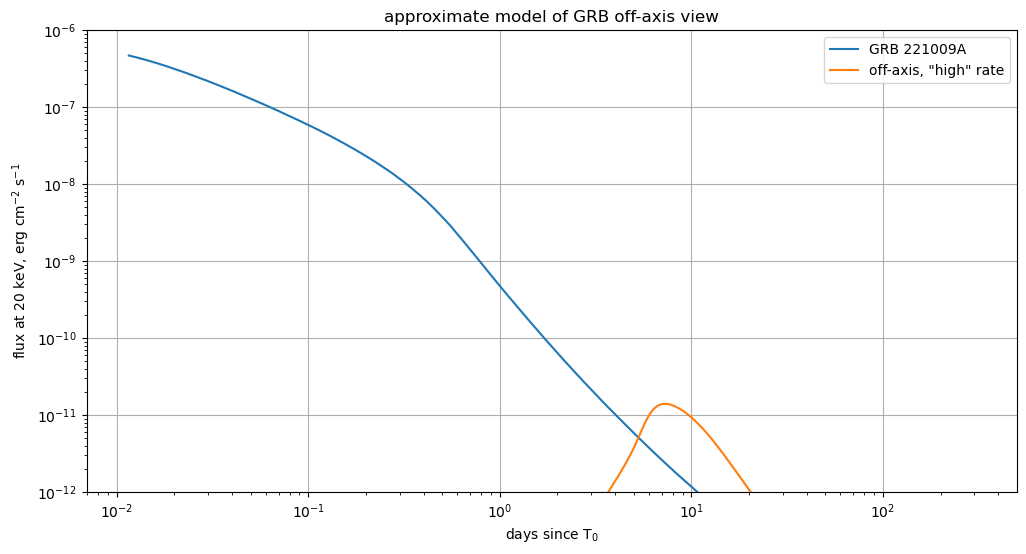

In [16]:
from matplotlib import pylab as plt

plt.figure(figsize=(12, 6))

# for thetaObs in np.linspace(0, 0.3, 10):
for l, thetaObs in [
            ('GRB 221009A', 0.04), 
            ('off-axis, "high" rate', 0.22)
        ]:
    Fnu = grb.fluxDensity(t, nu, **{**Z, 'thetaObs': thetaObs})
    rateRatio = thetaArea(thetaObs)/thetaArea(Z['thetaObs'])
    plt.plot(t/24/3600, Fnu*norm, 
             label=l
            #  label=f"{thetaObs} {rateRatio}"
             )
    
plt.xlabel("days since T$_0$")
plt.ylabel("flux at 20 keV, erg cm$^{-2}$ s$^{-1}$")

plt.title("approximate model of GRB off-axis view")


plt.grid()
plt.legend()

plt.loglog()

# plt.xlim([0.1,])

plt.ylim([1e-12, 1e-6])